In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path
from cenpy import products
import shapely.wkt

In [2]:
def geoify_df(station_df):
    #convert hr_df to geodataframe to plot the bike stations on map
    geometry = [Point(xy) for xy in zip(station_df.Longitude, station_df.Latitude)]
    crs = 4326
    station_gdf = gpd.GeoDataFrame(station_df, crs=crs, geometry=geometry)
    return station_gdf

In [3]:
hr_df = pd.read_csv("../Data/bikes_station_location.csv") #location of healthy ride bike stations

#get the 2010 census tracts in Pittsburgh
cenTract = gpd.read_file('../Data/2010_Census_Tracts/2010_Census_Tracts-shp/2010_Census_Tracts.shp')
#'../Data/2010_Census_Tracts/a36fc9b1-4e53-4fd1-80fb-db1554e213422020328-1-nbfxcj.l6b8.shp' is the same file

#convert hr_df to geodataframe to plot the bike stations on map
geometry = [Point(xy) for xy in zip(hr_df.Longitude, hr_df.Latitude)]
crs = 4326
hr_gdf = gpd.GeoDataFrame(hr_df, crs=crs, geometry=geometry)

In [4]:
PGH_demographics = products.ACS(2019).from_place('Pittsburgh, PA', level = 'tract',
                                                 place_type = 'County Subdivision',
                                                variables = ['B01003_001E', #total population
                                                            'B02001_002E', #white alone
                                                            'B02001_003E', #black or african american alone
                                                            'B02001_004E', #american indian / alaskan native
                                                            'B02001_005E' #asian alone
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Pittsburgh, PA to Pittsburgh city within layer County Subdivisions


In [5]:
PGH_commute = products.ACS(2019).from_place('Pittsburgh, PA', level = 'tract',
                                                 place_type = 'County Subdivision',
                                                variables = ['B08006_001E', 
                                                             'B08006_002E', 
                                                             'B08006_003E',
                                                             'B08006_004E', 
                                                             'B08006_005E', 
                                                             'B08006_006E', 
                                                             'B08006_007E',
                                                             'B08006_008E', 
                                                             'B08006_009E', 
                                                             'B08006_0010E', 
                                                             'B08006_0011E', 
                                                             'B08006_0012E', 
                                                             'B08006_0013E', 
                                                             'B08006_0014E', 
                                                             'B08006_0015E'
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Pittsburgh, PA to Pittsburgh city within layer County Subdivisions


In [6]:
Allgheny_demographics = products.ACS(2019).from_place('Allegheny , PA', level = 'tract',
                                                 place_type='County Subdivision',
                                                variables = ['B08006_001E', 
                                                             'B08006_002E', 
                                                             'B08006_003E',
                                                             'B08006_004E', 
                                                             'B08006_005E', 
                                                             'B08006_006E', 
                                                             'B08006_007E',
                                                             'B08006_008E', 
                                                             'B08006_009E', 
                                                             'B08006_0010E', 
                                                             'B08006_0011E', 
                                                             'B08006_0012E', 
                                                             'B08006_0013E', 
                                                             'B08006_0014E', 
                                                             'B08006_0015E'
                                                            ])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/cenpy/products.py:996: UserWarning: Cannot disambiguate placename Allegheny. Picking the shortest, best matched placename, Allegheny township, from Allegheny township, Allegheny township, Allegheny township, Allegheny township, Allegheny township, Allegheny township
  matchtarget, ixmax_row.target, ", ".join(double_winners.target.tolist())
/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Allegheny , PA to Allegheny township within layer County Subdivisions


In [7]:
Alleghney_demographics

NameError: name 'Alleghney_demographics' is not defined

In [8]:
pgh_crs = PGH_demographics.to_crs("EPSG:4326")
pgh_crs.head(1)

,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,state,county,tract
0,42003270300,"POLYGON ((-80.04299 40.47900, -80.04296 40.479...",2223.0,1154.0,908.0,0.0,0.0,42,003,270300


In [9]:
pgh_crs_2 = PGH_commute.to_crs("EPSG:4326")
pgh_crs_2.head(1)

,GEOID,geometry,B08006_001E,B08006_002E,B08006_003E,B08006_004E,B08006_005E,B08006_006E,B08006_007E,B08006_008E,B08006_009E,state,county,tract
0,42003270300,"POLYGON ((-80.04299 40.47900, -80.04296 40.479...",1042.0,635.0,465.0,170.0,132.0,17.0,21.0,250.0,238.0,42,003,270300


Text(0.5, 1.0, 'Percent of race (white) by census tract in relation to healthy Ride Stations \n Note: ACS has not reported for some Census Tracts')

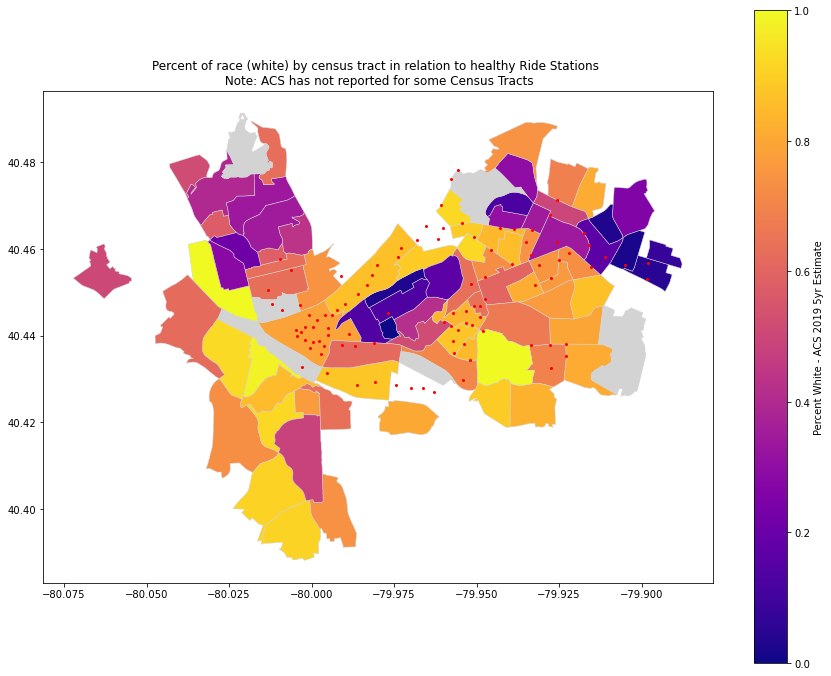

In [10]:
pgh_crs['perc_white'] = pgh_crs['B02001_002E'] / pgh_crs['B01003_001E']
ax = pgh_crs.plot(column = "perc_white", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5,
                   legend=True, legend_kwds={'label': "Percent White - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"},
                  missing_kwds={"color": "lightgrey"}
                 )
hr_gdf.plot(ax=ax, color="Red", markersize=4)
plt.title("Percent of race (white) by census tract in relation to healthy Ride Stations \n Note: ACS has not reported for some Census Tracts")

Text(0.5, 1.0, 'Percent of race (african american or black) by census tract in relation to Citi Bike Stations \n  Note: ACS has not reported for some Census Tracts')

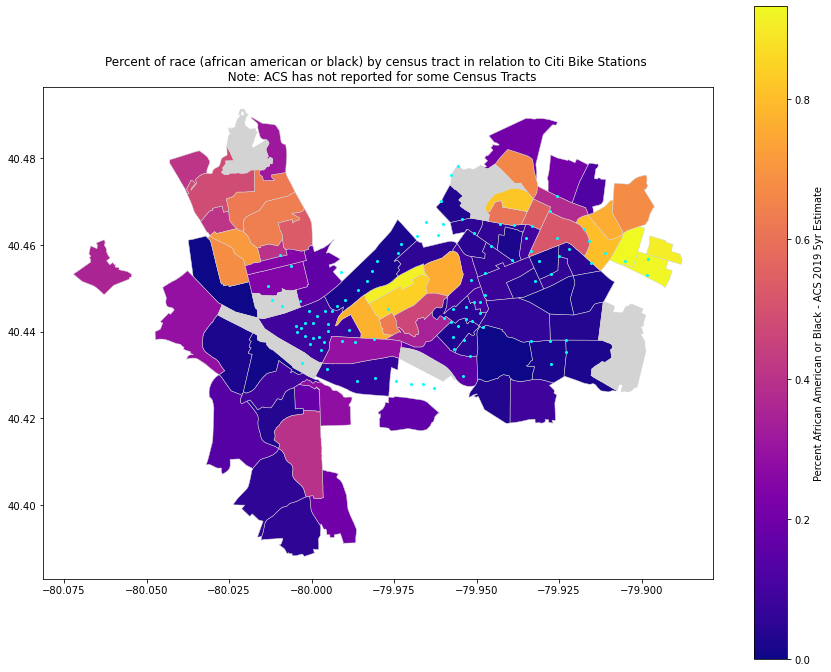

In [11]:
pgh_crs['perc_black'] = pgh_crs['B02001_003E'] / pgh_crs['B01003_001E']
ax2 = pgh_crs.plot(column = "perc_black", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5, legend=True, 
                    legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",
                                                                     'orientation': "vertical"},
                  missing_kwds={"color": "lightgrey"})
hr_gdf.plot(ax=ax2, color="cyan", markersize=4)
plt.title("Percent of race (african american or black) by census tract in relation to Citi Bike Stations \n  Note: ACS has not reported for some Census Tracts")

In [12]:
pgh_crs['perc_alone'] = pgh_crs['B08006_003E'] / pgh_crs['B08006_001E']
axcrs = pgh_crs.plot(column = "perc_alone", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5, 
                     legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",'orientation': "vertical"},
                     missing_kwds={"color": "lightgrey"}, 
                 )
hr_gdf.plot(ax=axcrs, color="Red", markersize=4)

KeyError: 'B08006_003E'

In [ ]:
pgh_crs['perc_alone'] = pgh_crs['B08006_003E'] / pgh_crs['B08006_001E']
axcrs = pgh_crs.plot(column = "perc_alone", cmap="plasma",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5, 
                     legend_kwds={'label': "Percent African American or Black - ACS 2019 5yr Estimate",'orientation': "vertical"},
                     missing_kwds={"color": "lightgrey"}, 
                 )
hr_gdf.plot(ax=axcrs, color="Red", markersize=4)